In [2]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


**Data exploration**

In [4]:
df.shape

(614, 13)

In [5]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Text(0.5, 1.0, 'Gender vs Martial Status')

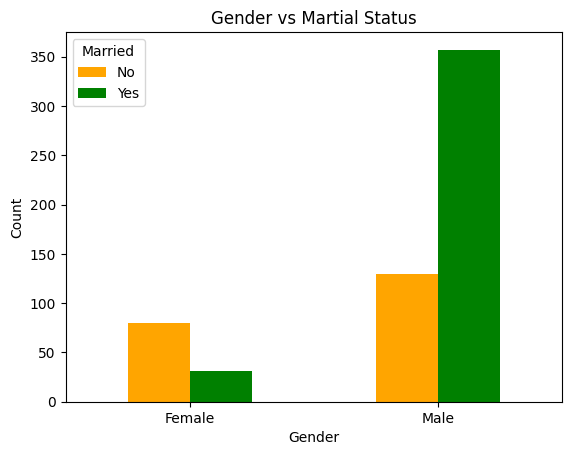

In [6]:
pd.crosstab(df.Gender,df.Married).plot(kind='bar',color=['orange','green'],stacked=False)
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.title('Gender vs Martial Status')

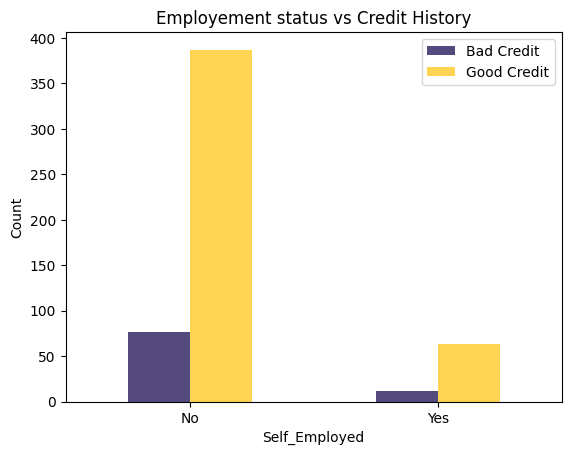

In [7]:
pd.crosstab(df.Self_Employed,df.Credit_History).plot(kind='bar',color=['#544a7d','#ffd452'],stacked=False)
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.title('Employement status vs Credit History')
plt.legend(['Bad Credit','Good Credit'])

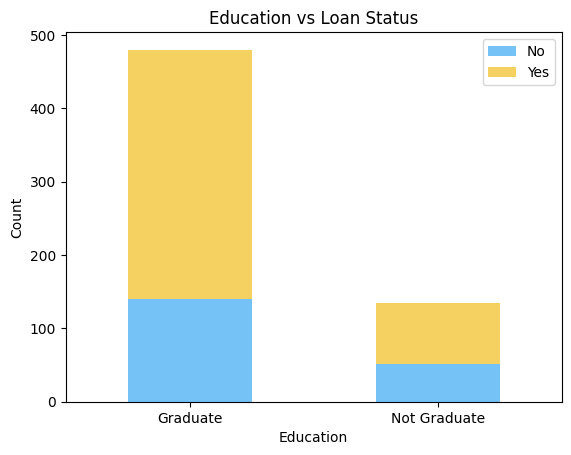

In [8]:
pd.crosstab(df.Education,df.Loan_Status).plot(kind='bar',color=['#75C2F6','#F4D160'],stacked=True)
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.title('Education vs Loan Status')
plt.legend(['No','Yes'])

Text(0.5, 1.0, 'Property Area vs Loan Status')

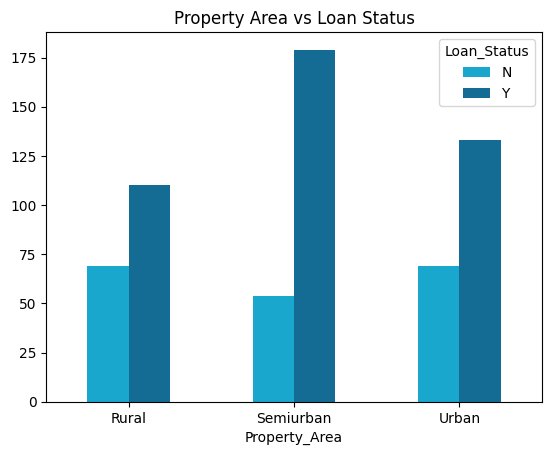

In [9]:
pd.crosstab(df.Property_Area,df.Loan_Status).plot(kind='bar',color=['#19A7CE','#146C94'],stacked=False)
plt.xticks(rotation=0)
plt.title('Property Area vs Loan Status')

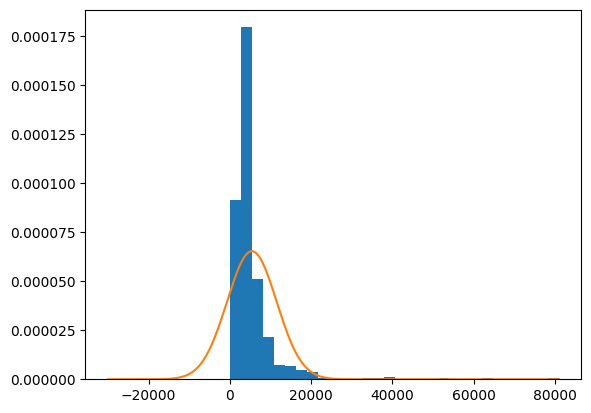

In [10]:
plt.hist(df.ApplicantIncome,bins=30,rwidth=1,density=True)
range=np.arange(-30000,df.ApplicantIncome.max(),0.1)
plt.plot(range,norm.pdf(range,df.ApplicantIncome.mean(),df.ApplicantIncome.std()))


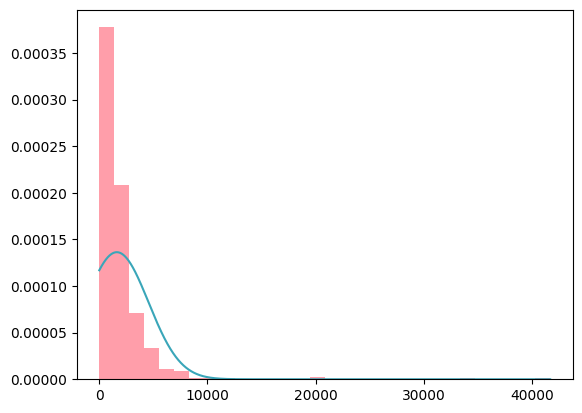

In [11]:
plt.hist(df.CoapplicantIncome,bins=30,rwidth=1,density=True,color='#FF9EAA')
range=np.arange(df.CoapplicantIncome.min(),df.CoapplicantIncome.max(),0.1)
plt.plot(range,norm.pdf(range,df.CoapplicantIncome.mean(),df.CoapplicantIncome.std()),color='#3AA6B9')


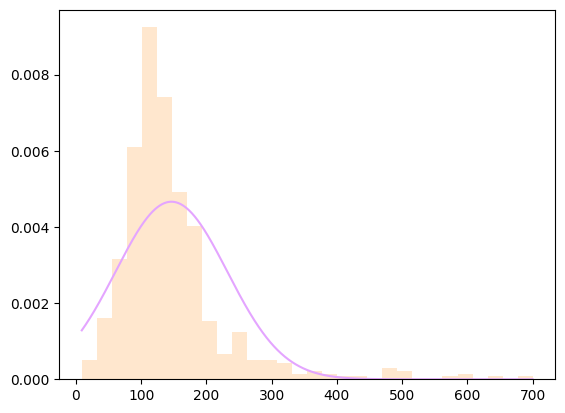

In [12]:
plt.hist(df.LoanAmount,bins=30,rwidth=1,density=True,color='#FFE7CE')
range=np.arange(df.LoanAmount.min(),df.LoanAmount.max(),0.1)
plt.plot(range,norm.pdf(range,df.LoanAmount.mean(),df.LoanAmount.std()),color='#E4A5FF')


**Data Cleaning**

In [13]:
df.drop(['Loan_ID'],axis='columns',inplace=True)

In [14]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [15]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

In [16]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

**One-Hot endcoding**

In [17]:
df=pd.get_dummies(df)
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,5849,0.0,146.412162,360.0,1.0,False,True,True,False,True,...,False,True,False,True,False,False,False,True,False,True
1,4583,1508.0,128.000000,360.0,1.0,False,True,False,True,False,...,False,True,False,True,False,True,False,False,True,False
2,3000,0.0,66.000000,360.0,1.0,False,True,False,True,True,...,False,True,False,False,True,False,False,True,False,True
3,2583,2358.0,120.000000,360.0,1.0,False,True,False,True,True,...,False,False,True,True,False,False,False,True,False,True
4,6000,0.0,141.000000,360.0,1.0,False,True,True,False,True,...,False,True,False,True,False,False,False,True,False,True


In [18]:
df.drop(['Gender_Female','Married_No','Education_Not Graduate','Self_Employed_No','Loan_Status_N','Dependents_3+','Property_Area_Rural'],axis='columns',inplace=True)

In [19]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,146.412162,360.0,1.0,True,False,True,False,False,True,False,False,True,True
1,4583,1508.0,128.000000,360.0,1.0,True,True,False,True,False,True,False,False,False,False
2,3000,0.0,66.000000,360.0,1.0,True,True,True,False,False,True,True,False,True,True
3,2583,2358.0,120.000000,360.0,1.0,True,True,True,False,False,False,False,False,True,True
4,6000,0.0,141.000000,360.0,1.0,True,False,True,False,False,True,False,False,True,True


In [20]:
rename={'Gender_Male': 'Gender', 'Married_Yes': 'Married', 
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
       'Loan_Status_Y': 'Loan_Status'}
df.rename(columns=rename,inplace=True)
df.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender', 'Married',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Education',
       'Self_Employed', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Loan_Status'],
      dtype='object')

In [21]:
df.replace([True,False],[1,0],inplace=True)
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents_0,Dependents_1,Dependents_2,Education,Self_Employed,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,5849,0.0,146.412162,360.0,1.0,1,0,1,0,0,1,0,0,1,1
1,4583,1508.0,128.000000,360.0,1.0,1,1,0,1,0,1,0,0,0,0
2,3000,0.0,66.000000,360.0,1.0,1,1,1,0,0,1,1,0,1,1
3,2583,2358.0,120.000000,360.0,1.0,1,1,1,0,0,0,0,0,1,1
4,6000,0.0,141.000000,360.0,1.0,1,0,1,0,0,1,0,0,1,1


**Remove Outliers**

In [22]:
Q1=df.ApplicantIncome.quantile(0.25)
Q3=df.ApplicantIncome.quantile(0.75)
IQR=Q3-Q1


In [23]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
lower_limit,upper_limit

(-1498.75, 10171.25)

In [24]:
df=df[(df['ApplicantIncome']<upper_limit)&(df['ApplicantIncome']>lower_limit)]

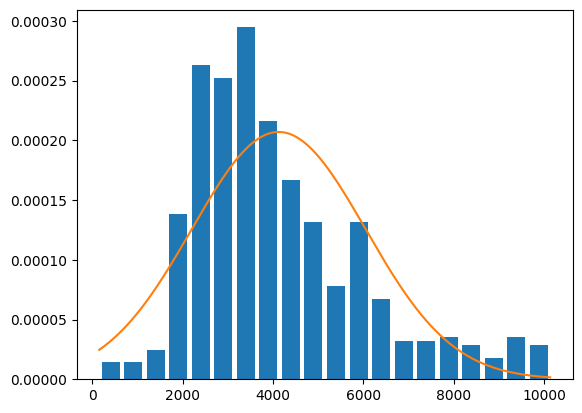

In [25]:
plt.hist(df.ApplicantIncome,bins=20,rwidth=0.8,density=True)
range=np.arange(df.ApplicantIncome.min(),df.ApplicantIncome.max(),0.1)
plt.plot(range,norm.pdf(range,df.ApplicantIncome.mean(),df.ApplicantIncome.std()))


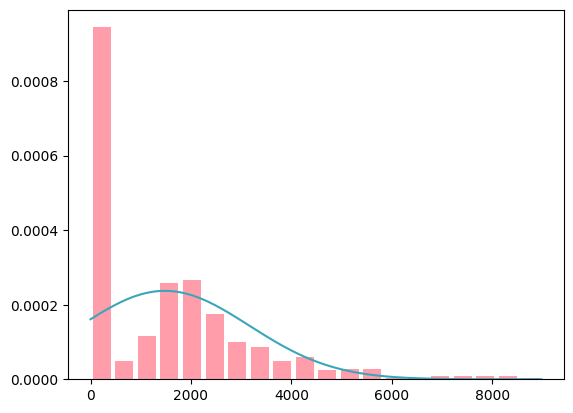

In [26]:
Q1=df.CoapplicantIncome.quantile(0.25)
Q3=df.CoapplicantIncome.quantile(0.75)
IQR=Q3-Q1
df=df[(df['CoapplicantIncome']<upper_limit)&(df['CoapplicantIncome']>lower_limit)]
plt.hist(df.CoapplicantIncome,bins=20,rwidth=0.8,density=True,color='#FF9EAA')
range=np.arange(df.CoapplicantIncome.min(),df.CoapplicantIncome.max(),0.1)
plt.plot(range,norm.pdf(range,df.CoapplicantIncome.mean(),df.CoapplicantIncome.std()),color='#3AA6B9')

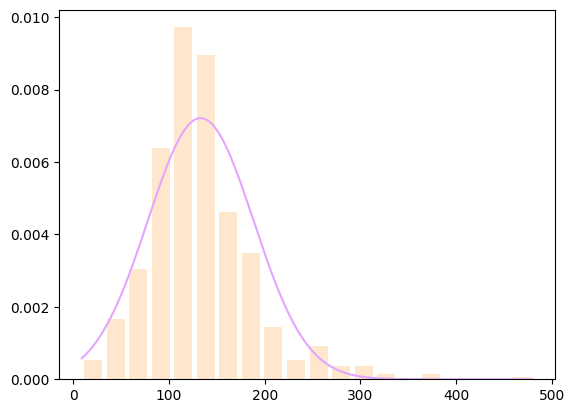

In [27]:
Q1=df.LoanAmount.quantile(0.25)
Q3=df.LoanAmount.quantile(0.75)
IQR=Q3-Q1
df=df[(df['LoanAmount']<upper_limit)&(df['LoanAmount']>lower_limit)]
plt.hist(df.LoanAmount,bins=20,rwidth=0.8,density=True,color='#FFE7CE')
range=np.arange(df.LoanAmount.min(),df.LoanAmount.max(),0.1)
plt.plot(range,norm.pdf(range,df.LoanAmount.mean(),df.LoanAmount.std()),color='#E4A5FF')

In [28]:
df.shape

(559, 15)

**Model Selection**

In [29]:
input=df.drop(['Loan_Status'],axis='columns')
target=df['Loan_Status']

In [30]:
model_params={
'random_forest':{
    'model':RandomForestClassifier(),
    'params':{
        'n_estimators':[1,5,10]
    }
},
'logistic_regression':{
    'model':LogisticRegression(solver='liblinear',multi_class='auto'),
    'params':{
        'C':[1,5,10]
    }
},
'Decision_Tree':{
    'model':DecisionTreeClassifier(),
    'params':{
        'criterion':['gini','entropy','log_loss'],
        'splitter':['best','random'],
        'max_depth':[5,10,20]
    }
},
'gaussian_NaiveBaye':{
    'model':GaussianNB(),
    'params':{}
}
}

In [31]:
scores=[]

for model_name,mp in model_params.items():
    clf=GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    clf.fit(input,target)
    scores.append({
        'model':model_name,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })
    

In [32]:
df=pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,random_forest,0.794289,{'n_estimators': 10}
1,logistic_regression,0.813948,{'C': 10}
2,Decision_Tree,0.805035,"{'criterion': 'log_loss', 'max_depth': 5, 'spl..."
3,gaussian_NaiveBaye,0.815766,{}


In [33]:
X_train,X_test,Y_train,Y_test=train_test_split(input,target,test_size=0.2)

In [34]:
model=GaussianNB()
model.fit(X_train,Y_train)

GaussianNB()

In [35]:
model.score(X_test,Y_test)

0.8482142857142857